In [ ]:
!pip install pandas
!pip install numpy==1.23

In [ ]:
!pip install tensorflow==2.12
!pip install pyarabic

In [ ]:
!pip install transformers

In [ ]:
!pip install ipywidgets
!pip install datasets
!pip install transformers[torch]
!pip install nvidia-ml-py3

In [1]:
# cell-1  
#load and clean the data (removing diacritics and unwanted text)

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import tensorflow as tf
import pandas as pd
import pyarabic.araby as araby
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)


df = pd.read_csv('poemsDataset.csv')
df.fillna('', inplace=True)
display(len(df))


def remove_diacritics(a):    
    return araby.strip_diacritics(a)

df['first_hemistich'] = df['first_hemistich'].apply(remove_diacritics)
df['second_hemistich'] = df['second_hemistich'].apply(remove_diacritics)

def normalizeBeforeTraining(df):
    df['first_hemistich'] = df['first_hemistich'].str.replace('النابغـة: ', '')
    df['second_hemistich'] = df['second_hemistich'].str.replace('الـربيع: ', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('عبيــد: ', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('امـرؤ القيسـ: ', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('امرؤ القيس: ', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(جلال الــــدين الــــرومي):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(لـوك الفيلسـوف الإنكليزي):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(كانت الفيلسوف الألماني ):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(بركســــــــــــــــون):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(الحـــــــــــــــور):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(الشــــــــــــــاعر):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('(الإنســـــــــــــــان):', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('العلم):', '', regex=False)
    df['first_hemistich'] = df['first_hemistich'].str.replace('(العشــــــــــــــــق):', '', regex=False)
    df['first_hemistich'] = df['first_hemistich'].str.replace('(الزهــــــــــــــــــرة):', '', regex=False)
    df['second_hemistich'] = df['second_hemistich'].str.replace('التوأم اليشكري: ', '', regex=False)  
    df['first_hemistich'] = df['first_hemistich'].str.replace('آ', 'أ')
    df['second_hemistich'] = df['second_hemistich'].str.replace('آ', 'أ')
    df['first_hemistich'] = df['first_hemistich'].str.replace('[/":?،؟]', '')
    df['second_hemistich'] = df['second_hemistich'].str.replace('[/":?،؟]', '')
    df['first_hemistich'] = df['first_hemistich'].str.replace('  ', ' ')
    df['second_hemistich'] = df['second_hemistich'].str.replace('  ', ' ')
    df['first_hemistich'] = df['first_hemistich'].str.replace('  ', ' ')
    df['second_hemistich'] = df['second_hemistich'].str.replace('  ', ' ')


normalizeBeforeTraining(df)
df.drop(df[(df['first_hemistich'] == '') & (df['second_hemistich'] == '')].index, inplace=True)

#if first_hemistich == '', then copy the text from second_hemistich. then delete the text in the second_hemistich
df['first_hemistich'] = df.apply(lambda x: x['second_hemistich'] if x['first_hemistich'] == '' else x['first_hemistich'], axis=1)
df['second_hemistich'] = df.apply(lambda x: '' if x['first_hemistich'] == x['second_hemistich'] else x['second_hemistich'], axis=1)

df.reset_index(drop=True, inplace=True)

display(len(df))
# display(df[:10])
print('done')

2023-07-30 10:59:54.042129: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-30 10:59:54.066356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 10:59:54.566470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2090907

2090907

done


In [15]:
# dfc[:10]
x = set(dfc['complete_meter'].values.tolist())
len(x)

33

In [16]:
x = dfc.groupby(['complete_meter']).count()
x

,first_hemistich,second_hemistich,meter,sub_meter,link,text,label
complete_meter,,,,,,,
baseet complete,262923,262923,262923,262923,262923,262923,262923
baseet majzuu,101,101,101,101,101,101,101
baseet mashture,12,12,12,12,12,12,12
baseet mukhala,2009,2009,2009,2009,2009,2009,2009
hazaj majzuu,9166,9166,9166,9166,9166,9166,9166
kamel ahuth,1698,1698,1698,1698,1698,1698,1698
kamel complete,399511,399511,399511,399511,399511,399511,399511
kamel majzuu,5694,5694,5694,5694,5694,5694,5694
kamel maktuu,5,5,5,5,5,5,5


In [2]:
# cell-2 
# preparing data for finetuning


df['second_hemistich'].replace('', 'E', inplace=True)
dfc = df[['first_hemistich', 'second_hemistich', 'meter', 'sub_meter', 'link']].copy()
dfc['text'] = dfc['first_hemistich'] + ' S ' + dfc['second_hemistich']

#removing verses without a meter
dfc = dfc[dfc['meter'] != ''] 
dfc = dfc[dfc['meter'] != 'unspecified']
dfc = dfc[dfc['meter'] != 'mixed']



classic = ['taweel', 'kamel', 'baseet', 'khafif', 'wafer', 'rajaz', 'ramel', 'mutaqarib',
           'saree', 'munsarih', 'mujtath', 'hazaj', 'madeed', 'mutadarak', 'muqtadab', 'mudari'] 

#including only verses with classical meters
dfc = dfc[dfc['meter'].isin(classic)]

dfc.reset_index(drop=True, inplace=True)

dfc['complete_meter'] = dfc['meter'] + ' ' + dfc['sub_meter']



dfc = dfc[dfc['complete_meter'] != 'kamel maktuu']
dfc = dfc[dfc['complete_meter'] != 'mutadarak manhuk']
dfc = dfc[dfc['complete_meter'] != 'baseet mashture']
dfc = dfc[dfc['complete_meter'] != 'munsarih manhuk']
dfc = dfc[dfc['complete_meter'] != 'mutaqarib majzuu']
dfc = dfc[dfc['complete_meter'] != 'mutadarak majzuu']
dfc = dfc[dfc['complete_meter'] != 'rajaz manhuk']
dfc = dfc[dfc['complete_meter'] != 'baseet majzuu']



dfc.reset_index(drop=True, inplace=True)


dfc['complete_meter'] = dfc['complete_meter'].astype('category')
# display(dfc['meter'].unique())

dfc['label'] = dfc['complete_meter'].cat.codes #assign cat_value for each meter type
dftrain, dftest = train_test_split(dfc, test_size=0.20, random_state=42, stratify=dfc['label'])
ytrain = dftrain['label'].values.tolist()
ytest = dftest['label'].values.tolist()



max_sequence_length = 32
train_batch_size = 256
classes_num = len(dfc['complete_meter'].unique())

display(classes_num)
display(len(dfc))
display(len(dftrain))
display(len(dftest))

25

1850027

1480021

370006

In [3]:
#cell-3
#loading the tokenizer and the model

from transformers import AutoTokenizer, BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('faisalq/bert-base-arapoembert')
# bert = TFBertModel.from_pretrained('faisalq/bert-base-arapoembert', from_pt=True)
model = BertForSequenceClassification.from_pretrained('faisalq/bert-base-arapoembert',
                                                      num_labels=classes_num).to('cuda')                                        


Some weights of the model checkpoint at faisalq/bert-base-arapoembert were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at faisalq/bert-ba

In [4]:
#cell-4
#tokenizing the data

xtrain = tokenizer(
    text=dftrain['text'].tolist(),
    add_special_tokens=True,
    max_length = max_sequence_length,
    truncation=True,
    padding='max_length', 
    return_tensors='pt',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


xtest = tokenizer(
    text=dftest['text'].tolist(),
    add_special_tokens=True,
    max_length = max_sequence_length,
    truncation=True,
    padding='max_length', 
    return_tensors='pt',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [7]:
# display(xtest)
display(xtest['input_ids'][0])

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([    2,  2914,   277,   151,  2890,  1110,    83, 31553,  8365,
           9, 25033,   122,    85,  4147,  5444,   678,   321, 40125,
           3,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)>

In [5]:
#group text and labels and create train_ds and test_ds

import torch

class NewGroupDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['label'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_ds = NewGroupDataset(xtrain, ytrain)
test_ds = NewGroupDataset(xtest, ytest)

from sklearn.metrics import accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return { 'accuracy': acc }

In [6]:
from transformers import Trainer, TrainingArguments


epochs = 2
save_steps = 10000 #save checkpoint every 10000 steps
batch_size = 256

training_args = TrainingArguments(
    output_dir = 'araPoemBERT_base_submeter/',
    overwrite_output_dir=True,
    num_train_epochs = epochs,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    save_steps = save_steps,
    save_total_limit = 5, #only save the last 5 checkpoints
    fp16=True,
    learning_rate = 5e-5,  # 5e-5 is the default
    logging_steps = 1000, #50_000
    evaluation_strategy = 'steps',
    # evaluate_during_training = True,
    eval_steps = 1000
    
)

trainer = Trainer(
    model = model,
    args = training_args,
    # data_collator=data_collator,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics = compute_metrics
)


# trainer.train(resume_from_checkpoint=True)
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
1000,0.182000,0.095572,0.976819
2000,0.095200,0.094289,0.977146
3000,0.093200,0.089946,0.977190
4000,0.090400,0.087622,0.977460
5000,0.088500,0.084724,0.977998
6000,0.084800,0.086981,0.977163
7000,0.068800,0.086260,0.977506
8000,0.067400,0.085104,0.978030
9000,0.065400,0.085303,0.978041
10000,0.065100,0.083761,0.978525


TrainOutput(global_step=11564, training_loss=0.08642212093515571, metrics={'train_runtime': 950.475, 'train_samples_per_second': 3114.277, 'train_steps_per_second': 12.167, 'total_flos': 4.062981478330867e+16, 'train_loss': 0.08642212093515571, 'epoch': 2.0})

In [7]:
trainer.save_model('araPoemBERT_base_submeter/')

In [8]:
p = trainer.predict(test_ds)
y_pred = np.argmax(p[0], axis = 1)

print(classification_report(ytest, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9884    0.9959    0.9921     52585
           1     0.5484    0.0423    0.0785       402
           2     0.8850    0.8603    0.8725      1833
           3     0.5000    0.1206    0.1943       340
           4     0.9769    0.9914    0.9841     79902
           5     0.5465    0.1238    0.2019      1139
           6     0.9874    0.9945    0.9909     34589
           7     0.3485    0.0991    0.1544       232
           8     0.9580    0.9225    0.9399      1755
           9     0.8462    0.3056    0.4490        72
          10     0.9783    0.9773    0.9778      3871
          11     0.9831    0.9780    0.9806      5965
          12     0.9458    0.8263    0.8820       190
          13     0.9501    0.9353    0.9426      1282
          14     0.5238    0.3333    0.4074        33
          15     0.9910    0.9921    0.9915     13897
          16     0.4725    0.5063    0.4888      1580
          17     0.9236    

<Figure size 640x480 with 0 Axes>

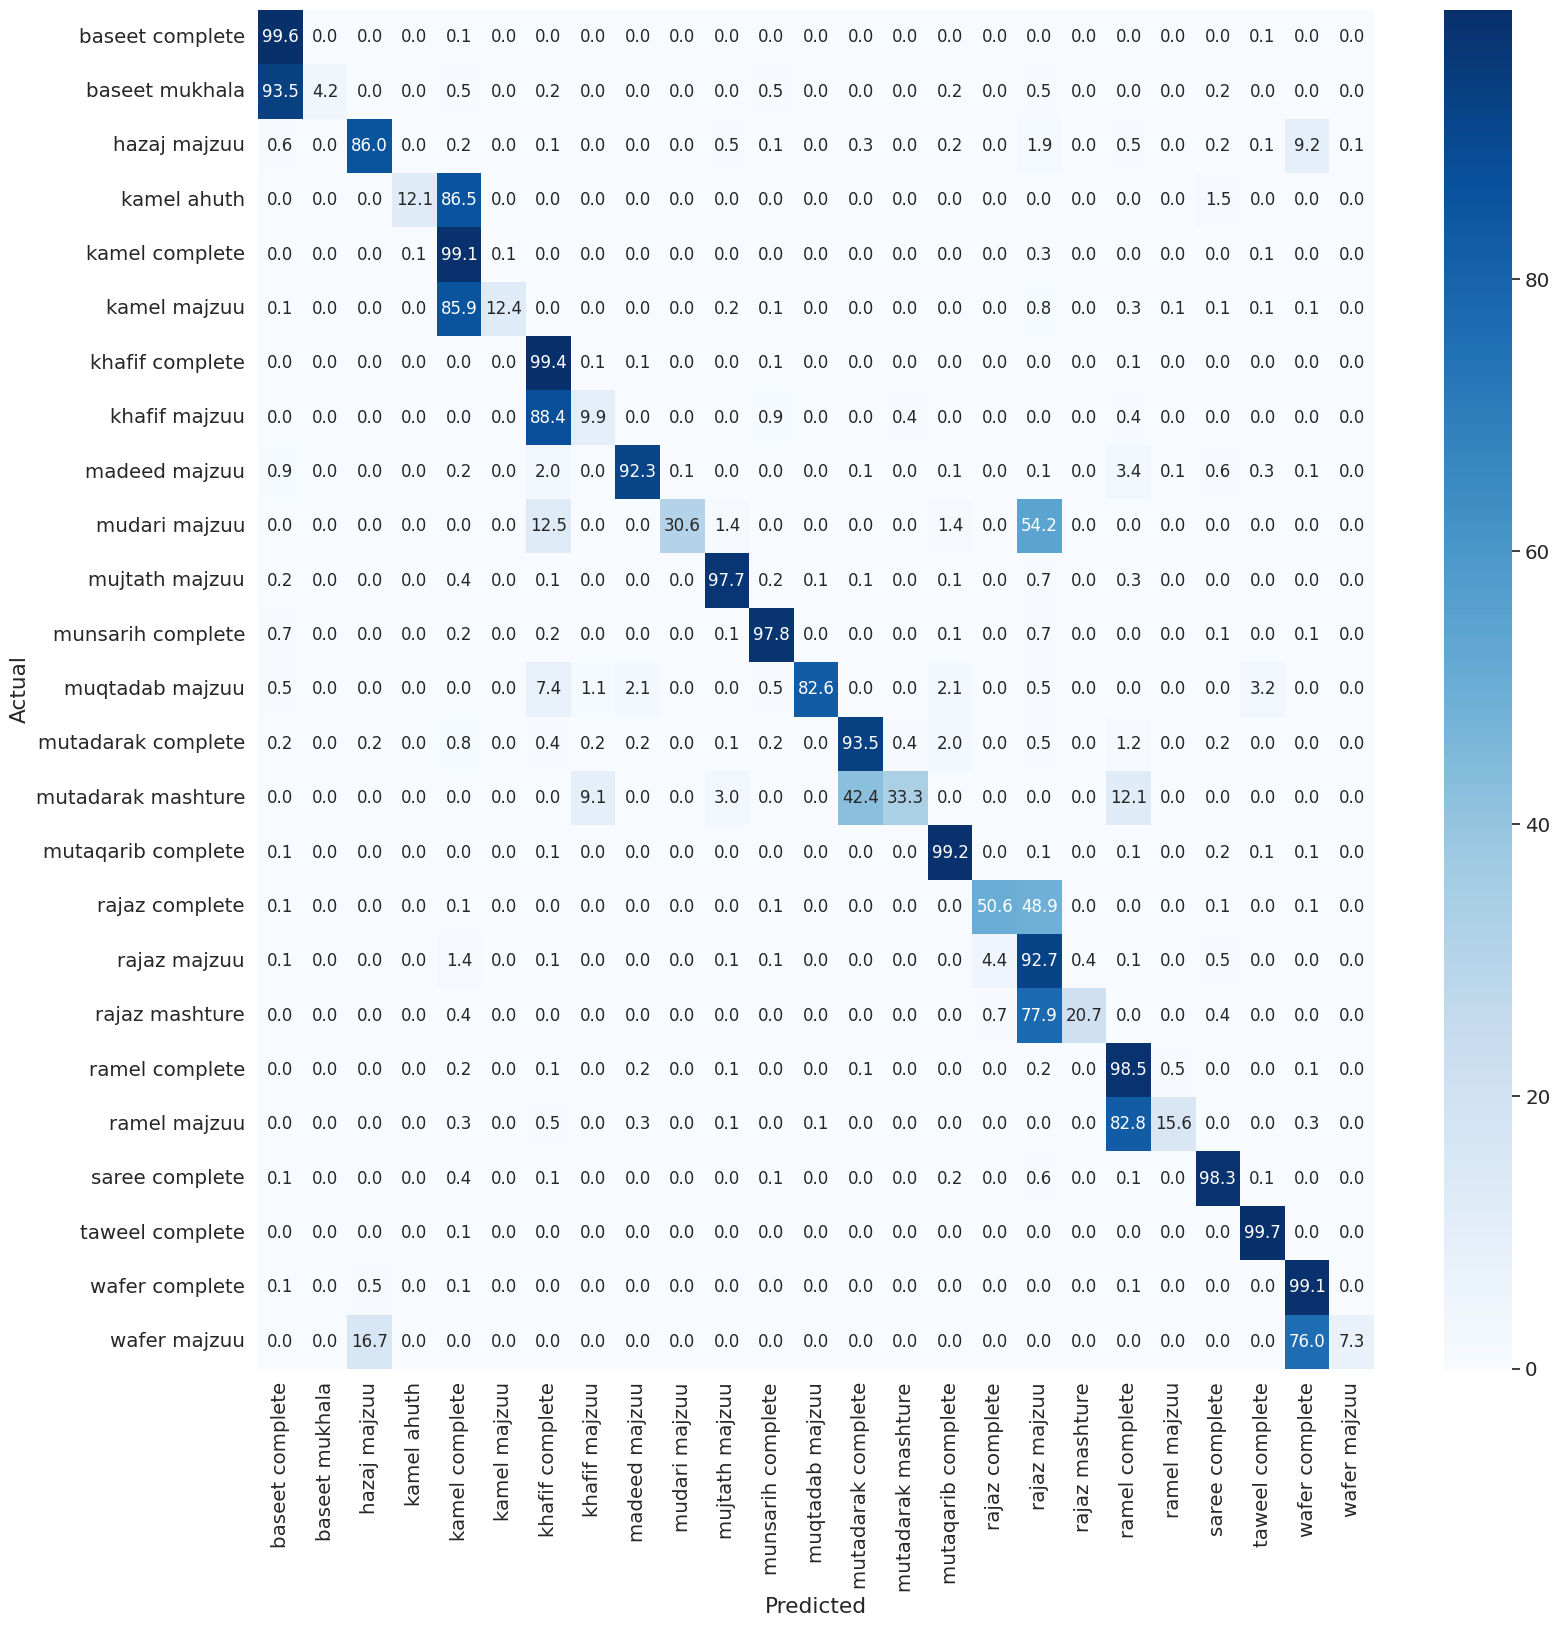

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sn, numpy as np
import matplotlib.pyplot as plt

classes = dfc['complete_meter'].cat.categories


matrix = confusion_matrix(ytest, y_pred)
cmn = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
cmn = cmn*100
plt.subplots_adjust(bottom=0.60)
fig, ax = plt.subplots(figsize=(18,18))
sn.set(font_scale=1.3)
sn.heatmap(cmn, annot=True, fmt='.1f', xticklabels=classes, yticklabels=classes, cmap="Blues",
          annot_kws={"size": 12})
plt.yticks(rotation=0)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.subplots_adjust(bottom=0.125)
plt.savefig('submeter_cm.png', dpi=fig.dpi)
plt.show(block=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn, numpy as np
import matplotlib.pyplot as plt

classes = dfc['complete_meter'].cat.categories


matrix = confusion_matrix(ytest, y_pred)
cmn = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
cmn = cmn*100
fig, ax = plt.subplots(figsize=(25,25))
sn.set(font_scale=1.2)
sn.heatmap(cmn, annot=True, fmt='.1f', xticklabels=classes, yticklabels=classes, cmap="Blues",
          annot_kws={"size": 11})
plt.yticks(rotation=0)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('submeter_cm.png')
plt.show(block=False)

In [11]:
dfc['complete_meter'].cat.categories

Index(['baseet complete', 'baseet mukhala', 'hazaj majzuu', 'kamel ahuth',
       'kamel complete', 'kamel majzuu', 'khafif complete', 'khafif majzuu',
       'madeed majzuu', 'mudari majzuu', 'mujtath majzuu', 'munsarih complete',
       'muqtadab majzuu', 'mutadarak complete', 'mutadarak mashture',
       'mutaqarib complete', 'rajaz complete', 'rajaz majzuu',
       'rajaz mashture', 'ramel complete', 'ramel majzuu', 'saree complete',
       'taweel complete', 'wafer complete', 'wafer majzuu'],
      dtype='object')

In [10]:
dfc['m'] = dfc['complete_meter'].astype(str) + ' ' + dfc['label'].astype(str)
df2 = dfc.groupby(['m'])['text'].count().sort_values()
display(df2)

m
mutadarak mashture 14       168
mudari majzuu 9             360
wafer majzuu 24             751
muqtadab majzuu 12          949
khafif majzuu 7            1158
rajaz mashture 18          1379
kamel ahuth 3              1698
baseet mukhala 1           2009
ramel majzuu 20            3726
kamel majzuu 5             5694
mutadarak complete 13      6411
rajaz complete 16          7898
madeed majzuu 8            8775
hazaj majzuu 2             9166
mujtath majzuu 10         19357
munsarih complete 11      29826
saree complete 21         61261
mutaqarib complete 15     69483
ramel complete 19         86131
rajaz majzuu 17          101979
wafer complete 23        153704
khafif complete 6        172947
baseet complete 0        262923
kamel complete 4         399511
taweel complete 22       442763
Name: text, dtype: int64

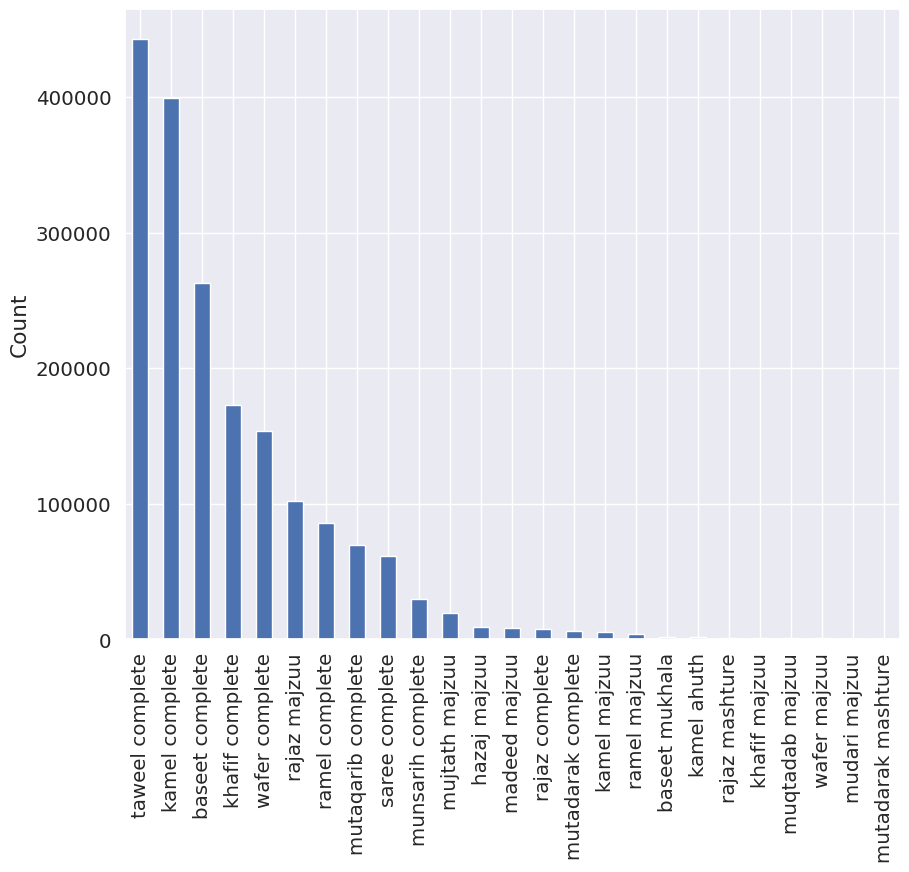

In [60]:
plt.subplots(figsize=(10,10))
plt.subplots_adjust(bottom=0.25)
plt.rcParams.update({'font.size': 24})
dfc['complete_meter'].value_counts().plot(kind='bar')
plt.ylabel('Number of Verses')
plt.xlabel('')
plt.savefig('submeter_distribution.png')
plt.ylabel('Count')
plt.show()

In [62]:
df.columns

Index(['poem_title', 'first_hemistich', 'second_hemistich', 'poet', 'meter',
       'sub_meter', 'البحر', 'جزء البحر', 'era', 'rhyme', 'قافية', 'type_en',
       'type_ar', 'link', 'gender'],
      dtype='object')

,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender


In [56]:
dd = pd.read_csv('submeter_cls_report.txt', sep="\s+")
dd['class'] = dfc['complete_meter'].cat.categories
# dd.to_csv('rhyme_cls_report.csv', encoding='utf-8', index=False)
dd

,precision,recall,f1-score,support,class
0,0.9884,0.9959,0.9921,52585,baseet complete
1,0.5484,0.0423,0.0785,402,baseet mukhala
2,0.8850,0.8603,0.8725,1833,hazaj majzuu
3,0.5000,0.1206,0.1943,340,kamel ahuth
4,0.9769,0.9914,0.9841,79902,kamel complete
5,0.5465,0.1238,0.2019,1139,kamel majzuu
6,0.9874,0.9945,0.9909,34589,khafif complete
7,0.3485,0.0991,0.1544,232,khafif majzuu
8,0.9580,0.9225,0.9399,1755,madeed majzuu
9,0.8462,0.3056,0.4490,72,mudari majzuu


In [57]:





dd.to_csv('submeter_cls_report.csv', encoding='utf-8', index=False)